In [1]:
import os, sys, glob, json, scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
os.chdir("../")
path = os.getcwd()
sys.path.insert(0, path)
import GWGen
from GWGen.WFGenerator import *

In [3]:
foldpath = os.getcwd()+"/Data/Output/"
filenames = glob.glob(foldpath+"*.json")
data = []
for file in filenames:
    with open(file, "r") as f:
        data.append(json.load(f))
data[-1]
datframe = pd.DataFrame(data)
datframe

,SMBHMASS,SecondaryMass,PROCAMASS,p0,e0,BHSpin,Trajectory Exit Reason,mismatch,faithfulness,DeltaNOrbits
0,10000000.0,10,3.000000e-19,4.830,0.1,1,Separatrix reached!,-3.774758e-15,1.0,-2.779211e-10
1,10000000.0,10,3.000000e-19,4.830,0.2,1,Separatrix reached!,1.043610e-14,1.0,-1.250645e-10
2,10000000.0,10,6.000000e-19,4.830,0.1,1,Separatrix reached!,5.648693e-11,1.0,-6.220921e-06
3,10000000.0,10,7.000000e-19,4.830,0.1,1,Separatrix reached!,1.588711e-09,1.0,-2.346764e-05
4,10000000.0,10,7.000000e-19,4.830,0.2,1,Separatrix reached!,1.719844e-09,1.0,-2.274096e-05
...,...,...,...,...,...,...,...,...,...,...
7499,1000000.0,10,3.000000e-18,10.900,0.5,1,Separatrix reached!,-6.661338e-16,1.0,7.225949e-10
7500,1000000.0,10,3.000000e-18,10.685,0.6,1,Separatrix reached!,2.664535e-15,1.0,2.964492e-10
7501,1000000.0,10,3.000000e-18,10.470,0.7,1,Separatrix reached!,1.776357e-14,1.0,2.964492e-10
7502,1000000.0,10,4.000000e-18,11.100,0.1,1,Separatrix reached!,1.044831e-12,1.0,3.501806e-08


In [10]:
BHMasses = np.asarray([data[i]["SMBHMASS"] for i in range(len(data))])
ProcaMasses = np.asarray([data[i]["PROCAMASS"] for i in range(len(data))])
Faith = np.asarray([data[i]["faithfulness"] for i in range(len(data))])

interps = []
bhmasses = []
newpran = []
out = {}
for inx, b in enumerate(BHMasses):
    pmass = ProcaMasses[BHMasses==b]
    sorter = np.argsort(pmass)
    pmass = pmass[sorter]
    faith = Faith[BHMasses==b][sorter]
    if len(faith)<2:
        continue
    bhmasses.append(b)
    out[str(b)]=(pmass, faith)
    interps.append(sp.interpolate.interp1d(pmass, faith, bounds_error=False))

In [11]:
xdat = []
ydat = []
zdat = []
for inx, b in enumerate(bhmasses):
    for inx1, p in enumerate(np.arange(min(ProcaMasses), max(ProcaMasses), 1e-18)):
        xdat.append(b)
        ydat.append(p)
        zdat.append(interps[inx](p))

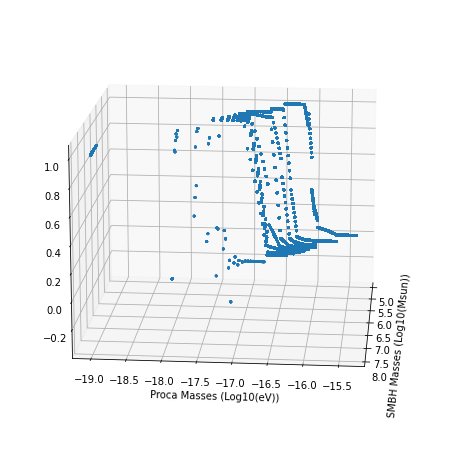

In [12]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(np.log10(xdat), np.log10(ydat), zdat,s=3)
ax.set_ylabel("Proca Masses (Log10(eV))")
ax.set_xlabel("SMBH Masses (Log10(Msun))")
ax.view_init(15,5)

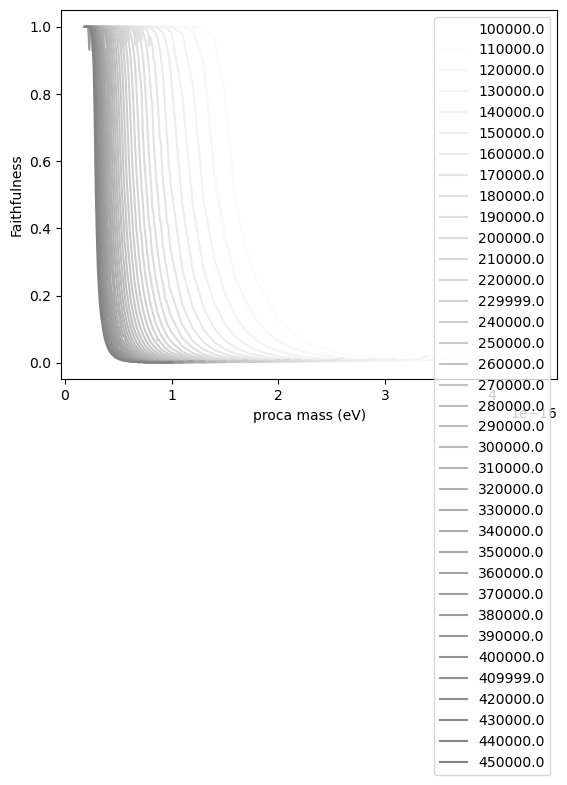

In [6]:
for inx, i in enumerate(sorted(list(map(float,out.keys())))):
    col = str(0.5*float(1-inx/len(out.keys()))+0.5)
    keystr = str(int(i))
    plt.plot(out[keystr][0], out[keystr][1], label=str(i), color=col)
    plt.xlabel(r"proca mass (eV)")
    plt.ylabel("Faithfulness")
    plt.legend()

In [13]:
for inx, i in enumerate(sorted(list(map(float,out.keys())))):
    col = str(0.5*float(1-inx/len(out.keys()))+0.5)
    keystr = str(int(i))
    pmass = out[keystr][0]
    faith = out[keystr][1]
    alpha = [alphavalue(i, j) for j in pmass]
    plt.plot(alpha, faith, label=str(i), color=col)
    plt.xlabel(r"$\alpha$")
    plt.ylabel("Faithfulness")
    plt.legend()

KeyError: '100000'

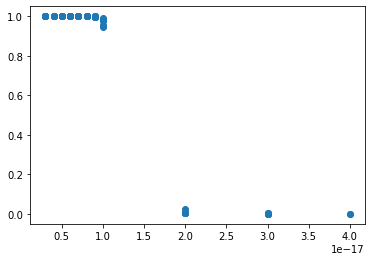

In [30]:
reduceddat=datframe[(datframe["SMBHMASS"]==900000)&(datframe["e0"]==0.5)]
pmass=reduceddat["PROCAMASS"]
faith = reduceddat["faithfulness"]
plt.scatter(pmass, faith)

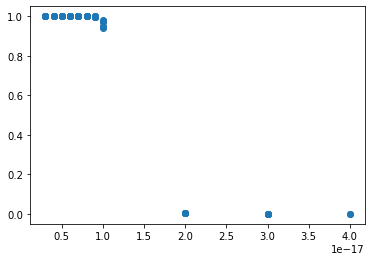

In [31]:
reduceddat=datframe[(datframe["SMBHMASS"]==900000)&(datframe["e0"]==0.7)]
pmass=reduceddat["PROCAMASS"]
faith = reduceddat["faithfulness"]
plt.scatter(pmass, faith)